<a href="https://colab.research.google.com/github/mo-9/GAN/blob/main/dcGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist

In [2]:
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU

In [3]:
from keras.models import Sequential,Model

In [4]:
from tensorflow.keras.optimizers import Adam # - Works

#from keras.optimizers import Adam

In [5]:
import warnings

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
(X_train,_),(_,_)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train=(X_train - 127.5) /127.5

In [10]:
X_train.min()

-1.0

In [11]:
X_train.max()

1.0

In [12]:
EPOCH=50
BATCH_SIZE=250
HALF_BATCH=128
NO_OF_BATCH=int(X_train.shape[0]/BATCH_SIZE)

In [13]:
NO_OF_BATCH

240

In [14]:
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
generator=Sequential()

In [16]:
generator.add(Dense(units=7*7*128,input_shape=(NOISE_DIM,)))

In [17]:
generator.add(Reshape((7,7,128)))

In [18]:
generator.add(LeakyReLU(0.2))

In [19]:
generator.add(BatchNormalization())

In [20]:
generator.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))

In [21]:
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

In [22]:
generator.add(Conv2DTranspose(1,(3,3),strides=(2,2),padding='same',activation='tanh'))

In [23]:
generator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)

In [24]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        73792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [33]:
descriminator=Sequential()
descriminator.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))

In [34]:
descriminator.add(LeakyReLU(0.2))

In [35]:
descriminator.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
descriminator.add(LeakyReLU(0.2))

In [36]:
descriminator.add(Flatten())


In [37]:
descriminator.add(Dense(100))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dense(1,activation='sigmoid'))
descriminator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
descriminator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               627300    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 100)              

In [39]:
descriminator.trainable=False
gen_input=Input(shape=(NOISE_DIM,))
gen_img=generator(gen_input)
gen_out=descriminator(gen_img)
model=Model(gen_input,gen_out)
model.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         708609    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 701897    
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [40]:
X_train=X_train.reshape(-1,28,28,1)

In [42]:
X_train.shape

(60000, 28, 28, 1)

In [51]:
def display_images(samples=25):
  noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_img=generator.predict(noise)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_img[i].reshape(28,28),cmap='binary')
    plt.axes('off')
plt.show()    


EPOCH1,disc loss 0.0025699543456236523,Generator loss 0.005614469448725383
EPOCH1,disc loss 0.005069081609447797,Generator loss 0.011263894041379292
EPOCH1,disc loss 0.007622215896844864,Generator loss 0.016970790922641754
EPOCH1,disc loss 0.010271434982617697,Generator loss 0.02232834796110789
EPOCH1,disc loss 0.012706166443725428,Generator loss 0.0280091201265653
EPOCH1,disc loss 0.015101765096187592,Generator loss 0.03380978554487228
EPOCH1,disc loss 0.01753662545233965,Generator loss 0.039453197022279105
EPOCH1,disc loss 0.01993655568609635,Generator loss 0.04521643469731013
EPOCH1,disc loss 0.022462659639616807,Generator loss 0.050740738213062284
EPOCH1,disc loss 0.02485316079109907,Generator loss 0.05656956036885579
EPOCH1,disc loss 0.027354576562841734,Generator loss 0.06214710424343745
EPOCH1,disc loss 0.029861104177931943,Generator loss 0.06784952829281489
EPOCH1,disc loss 0.032326055628558,Generator loss 0.07330800344546635
EPOCH1,disc loss 0.034785354323685166,Generator loss

TypeError: ignored

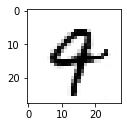

In [52]:
d_losses=[]
g_losses=[]
for epoch in range(EPOCH):
  epoch_d_loss=0.0
  epoch_g_loss=0.0
  for step in range(NO_OF_BATCH):
    idx=np.random.randint(0,60000,HALF_BATCH)
    real_img=X_train[idx]
    noise=np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_img=generator.predict(noise)
    real_y=np.ones((HALF_BATCH,1))*0.9
    fake_y=np.zeros((HALF_BATCH,1))
    d_loss_real=descriminator.train_on_batch(real_img,real_y)
    d_loss_fake=descriminator.train_on_batch(fake_img,fake_y)
    d_loss=0.5*d_loss_real + 0.5*d_loss_fake
    epoch_d_loss += d_loss
    #######################
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss
    print(f"EPOCH{epoch+1},disc loss {epoch_d_loss/NO_OF_BATCH},Generator loss {epoch_g_loss/NO_OF_BATCH}")
    d_losses.append(epoch_d_loss/NO_OF_BATCH)
    g_losses.append(epoch_g_loss/NO_OF_BATCH)
    if (epoch +1) % 10 ==0:
      generator.save('generator.h5')
      display_images()

